#### Stress Detection with Machine Learning
  
Stress detection is a challenging task, as there are so many words tahta can be sued by people on their social media that can show whether a person is having psychological stress or not. While looking for datasets that can be used to train a machine learning model for stress detection, I found a dataset on Kaggle with 116 columns. We only need to use the text and label column for this task.

In [34]:
# Import libraries and the dataset
import os
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB


# Directorio actual
current_dir = os.getcwd()
print(f"Directorio: {current_dir}")
# Directorio dos niveles arriba (para acceder al dataset)
parent_dir = os.path.abspath( os.path.join( current_dir, os.path.pardir, os.path.pardir ) )
print(f"Directorio padre: {parent_dir}")

data = pd.read_csv( parent_dir + "/Datasets/20240214a_stress.csv")
print(data.head())


Directorio: /home/xamanek/PythonProjects/ML_Transformers_001/MachineLearning/Classification
Directorio padre: /home/xamanek/PythonProjects/ML_Transformers_001
          subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1

In [35]:
# Check for any null values or not: 

print( data.isnull().sum() )

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64


In [36]:
nltk.download("stopwords")
stemmer = nltk.SnowballStemmer( "english" )
stopword = set( stopwords.words( 'english' ) )

def clean(text):
  text = str(text).lower()
  text = re.sub( '\[.*?\]', '', text )
  text = re.sub( 'https?://\S+|www\.\S+', '', text )
  text = re.sub( '<.*?>+', '', text )
  text = re.sub( '[%s]' % re.escape( string.punctuation ), '', text )
  text = re.sub( '\n', '', text )
  text = re.sub( '\w*\d\w*', '', text )
  text = [word for word in text.split( ' ' ) if word not in stopword ]
  text = " ".join( text )
  text = [stemmer.stem( word ) for word in text.split( ' ' ) ]
  text = " ".join( text )
  return text

data["text"] = data[ "text" ].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/xamanek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


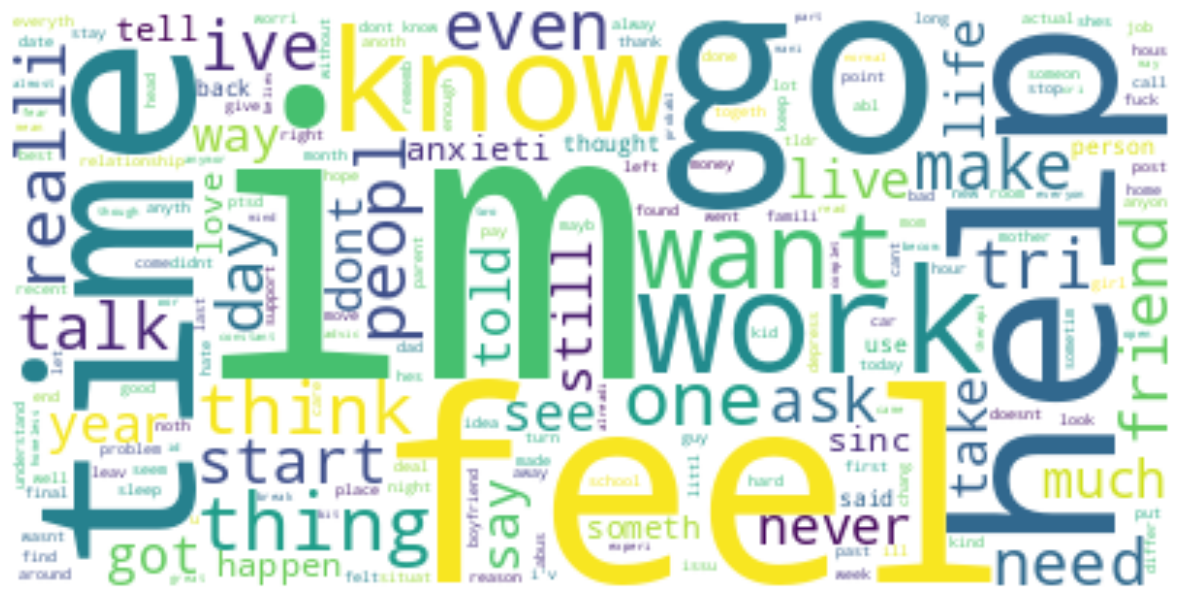

In [37]:
text = " ".join( i for i in data.text )
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
  stopwords = stopwords, 
  background_color = "white" 
). generate( text )
plt.figure( figsize = ( 15, 10 ) )
plt.imshow( wordcloud, interpolation = 'bilinear' )
plt.axis( "off" )
plt.show()

In [38]:
data["label"] = data["label"].map( { 0: "No Stress", 1: "Stress" } )
data = data[ [ "text", "label" ] ]
print( data.head() )

                                                text      label
0  said felt way sugget go rest trigger ahead you...     Stress
1  hey rassist sure right place post goe  im curr...  No Stress
2  mom hit newspap shock would know dont like pla...     Stress
3  met new boyfriend amaz kind sweet good student...     Stress
4  octob domest violenc awar month domest violenc...     Stress


In [39]:
x = np.array( data[ "text" ] )
y = np.array( data[ "label" ] )

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split( 
  X, y, test_size = 0.33, random_state = 42 )

In [40]:
model = BernoulliNB()
model.fit( xtrain, ytrain )
print("Log prior probabilities of classes: ", model.class_log_prior_ )

Log prior probabilities of classes:  [-0.74109604 -0.64739261]


In [42]:
user = input( "Enter a text: " )
data = cv.transform( [user] ).toarray()
output = model.predict( data )
print( output )

['No Stress']


In [43]:
predictions = model.predict(xtest)
print( "Algunas predicciones: ", predictions[:10] )

Algunas predicciones:  ['No Stress' 'No Stress' 'Stress' 'Stress' 'No Stress' 'No Stress'
 'Stress' 'No Stress' 'No Stress' 'No Stress']


In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Compute the precision
accuracy = accuracy_score( ytest, predictions )
print( "\nPrecision: ", accuracy )

# Show confussion matrix
print( "\nConfussion Matrix:\n", confusion_matrix( ytest, predictions ) )

# Show classification report
print( "\nClassification report:\n", classification_report( ytest, predictions ) )


Precision:  0.7470651013874067

Confussion Matrix:
 [[283 161]
 [ 76 417]]

Classification report:
               precision    recall  f1-score   support

   No Stress       0.79      0.64      0.70       444
      Stress       0.72      0.85      0.78       493

    accuracy                           0.75       937
   macro avg       0.75      0.74      0.74       937
weighted avg       0.75      0.75      0.74       937

